# Used Car Dataset
Dataset yang saya gunakan untuk Research ini adalah used_car_dataset.csv atau dataset yang berisikan data mobil bekas di pasar india. Dataset ini memiliki total data sebanyak 9,582 dengan 11 kolom, jika kita lihat berdasarkan isi data setiap kolom, dataset ini memiliki jenis data campuran. Disini saya akan melakukan Pre-processing data pada dataset ini dengan memanfaatkan beberapa library yang tersedia di dalam python, Tujuan yang akan saya lakukan untuk dataset ini adalah memprediksi harga mobil


In [22]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Data Wrangling
Proses Data Wrangling ini meliputi

In [23]:
df = pd.read_csv('/content/used_car_dataset.csv')
print (df.head(10))
print (df.info())

           Brand                model  Year  Age     kmDriven Transmission  \
0          Honda                 City  2001   23    98,000 km       Manual   
1         Toyota               Innova  2009   15  190000.0 km       Manual   
2     Volkswagen            VentoTest  2010   14    77,246 km       Manual   
3  Maruti Suzuki                Swift  2017    7    83,500 km       Manual   
4  Maruti Suzuki               Baleno  2019    5    45,000 km    Automatic   
5            BMW                   X3  2014   10    83,000 km    Automatic   
6         Toyota               Innova  2014   10   168,000 km       Manual   
7            BMW             5 Series  2019    5    25,000 km    Automatic   
8  Maruti Suzuki  maruti-suzuki-dzire  2020    4    33,759 km       Manual   
9           Ford             Ecosport  2017    7    69,713 km       Manual   

    Owner FuelType PostedDate  \
0  second   Petrol     Nov-24   
1  second   Diesel     Jul-24   
2   first   Diesel     Nov-24   
3  second

# 1
yang perlu kita lakukan adalah menghapus kolom yang tidak diperlukan untuk proses analisis

Jika tujuannya untuk memprediksi Harga , Kolom yang tidak diperlukan mencakup : AdditionInfo, Age dan PostedDate

In [24]:
df.drop(['Age','PostedDate','AdditionInfo'],axis = 1,inplace= True)
df.head((10))

,Brand,model,Year,kmDriven,Transmission,Owner,FuelType,AskPrice
0,Honda,City,2001,"98,000 km",Manual,second,Petrol,"₹ 1,95,000"
1,Toyota,Innova,2009,190000.0 km,Manual,second,Diesel,"₹ 3,75,000"
2,Volkswagen,VentoTest,2010,"77,246 km",Manual,first,Diesel,"₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,"83,500 km",Manual,second,Diesel,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,"45,000 km",Automatic,first,Petrol,"₹ 6,85,000"
5,BMW,X3,2014,"83,000 km",Automatic,first,Diesel,"₹ 13,50,000"
6,Toyota,Innova,2014,"168,000 km",Manual,second,Diesel,"₹ 10,25,000"
7,BMW,5 Series,2019,"25,000 km",Automatic,second,Diesel,"₹ 59,50,000"
8,Maruti Suzuki,maruti-suzuki-dzire,2020,"33,759 km",Manual,second,Petrol,"₹ 6,22,000"
9,Ford,Ecosport,2017,"69,713 km",Manual,second,Petrol,"₹ 6,49,000"


# 2
Selanjutnya adalah menghilangkan Missing Values, Jika kita lihat hanya kolom kmDriven yang memiliki missing values sebanyak 47, maka kita lakukan proses menambah missing values dengan menggunakan mean dari data kolom kmDriven

In [35]:
print("\nMissing Values per Column Before Cleaning:")
print(df.isnull().sum())

# Mengubah Tipe Data Object menjadi String terlebih dahulu
df['kmDriven'] = df['kmDriven'].astype(str)
df['kmDriven'] = df['kmDriven'].str.replace('km', '').str.replace(',', '').astype(float)

df['AskPrice'] = df['AskPrice'].astype(str)
df['AskPrice'] = df['AskPrice'].str.replace('₹', '').str.replace(',', '').astype(float)

# Mengisi nilai yang hilang dengan rata-rata
df['kmDriven'] = df['kmDriven'].fillna(df['kmDriven'].mean())

print("\nMissing Values per Column After Cleaning:")
print (df.head(10))
print(df.isnull().sum())


Missing Values per Column Before Cleaning:
Brand                   0
model                   0
Year                    0
kmDriven                0
Transmission            0
Owner                   0
FuelType                0
AskPrice                0
transmission_encoded    0
fueltype_encoded        0
owner_encoded           0
dtype: int64

Missing Values per Column After Cleaning:
           Brand                model  Year  kmDriven Transmission   Owner  \
0          Honda                 City  2001   98000.0       Manual  second   
1         Toyota               Innova  2009  190000.0       Manual  second   
2     Volkswagen            VentoTest  2010   77246.0       Manual   first   
3  Maruti Suzuki                Swift  2017   83500.0       Manual  second   
4  Maruti Suzuki               Baleno  2019   45000.0    Automatic   first   
5            BMW                   X3  2014   83000.0    Automatic   first   
6         Toyota               Innova  2014  168000.0       Manual  

# 3
Setelah Mengisi Missing Values, selanjutnya adalah menghapus data duplikat dan hasilnya dataset ini tidak memiliki data duplikat karena memiliki hasil yang sama

In [26]:
print ("\nDataset sebelum menghapus duplikasi:")
print(df.shape)

# Menghapus data duplikat
df = df.drop_duplicates()

print("\nDataset setelah menghapus duplikasi:")
print(df.shape)


Dataset sebelum menghapus duplikasi:
(9582, 8)

Dataset setelah menghapus duplikasi:
(8761, 8)


# 4
Merubah Isi data kolom Kategorikal menjadi numerik agar proses machine learning dapat terjalani, Kolom Owner, FuelType dan Transmission merupakan kolom kategorikal

In [27]:
# Inisialisasi encoder
le = LabelEncoder()

# Mengubah kolom menjadi numerik
df['transmission_encoded'] = le.fit_transform(df['Transmission'])
df['fueltype_encoded'] = le.fit_transform(df['FuelType'])
df['owner_encoded'] = le.fit_transform(df['Owner'])

# Lihat hasil
print(df[['Transmission', 'transmission_encoded']].head())
print(df[['FuelType', 'fueltype_encoded']].head())
print(df[['Owner', 'owner_encoded']].head())

  Transmission  transmission_encoded
0       Manual                     1
1       Manual                     1
2       Manual                     1
3       Manual                     1
4    Automatic                     0
  FuelType  fueltype_encoded
0   Petrol                 2
1   Diesel                 0
2   Diesel                 0
3   Diesel                 0
4   Petrol                 2
    Owner  owner_encoded
0  second              1
1  second              1
2   first              0
3  second              1
4   first              0


# 5
Normalisasi Data Numerik berguna agar model machine learning nantinya dapat mempercepat konvergensi dan meningkatkan kinerja model nantinya

Kolom yang perlu dinormalisasi pada dataset ini adalah kmDriven dan AskPrice

In [38]:
# Normalisasi Min-Max
scaler = MinMaxScaler()
df[['kmDriven', 'AskPrice']] = scaler.fit_transform(df[['kmDriven', 'AskPrice']])

print(df)

              Brand      model  Year  kmDriven Transmission   Owner  \
0             Honda       City  2001  0.100000       Manual  second   
1            Toyota     Innova  2009  0.193877       Manual  second   
2        Volkswagen  VentoTest  2010  0.078822       Manual   first   
3     Maruti Suzuki      Swift  2017  0.085204       Manual  second   
4     Maruti Suzuki     Baleno  2019  0.045918    Automatic   first   
...             ...        ...   ...       ...          ...     ...   
9576        Porsche    Cayenne  2023  0.007857    Automatic   first   
9578  Maruti Suzuki   Alto-800  2020  0.056122       Manual   first   
9579  Maruti Suzuki       Ritz  2013  0.093877       Manual   first   
9580        Hyundai      Verna  2019  0.073469    Automatic   first   
9581        Hyundai    New i20  2021  0.084926       Manual  second   

        FuelType  AskPrice  transmission_encoded  fueltype_encoded  \
0         Petrol  0.004237                     1                 2   
1      

# Data Availability Checking dan Descriptive Statistic
Setelah Proses Data Wrangling selesai selanjutnya kita melakukan pengecekan terhadap data apakah terdapat data yang null dan eror. Jika dilihat dari hasilnya eror dan null sudah diperbaiki

In [39]:
# Informasi tentang kolom dan tipe data
print("\nDataset Info:")
print(df.info())

# Statistik deskriptif
print("\nDescriptive Statistics:")
print(df.describe())

# Mengecek jumlah nilai yang hilang
print("\nMissing Values per Column:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 8761 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 8761 non-null   object 
 1   model                 8761 non-null   object 
 2   Year                  8761 non-null   int64  
 3   kmDriven              8761 non-null   float64
 4   Transmission          8761 non-null   object 
 5   Owner                 8761 non-null   object 
 6   FuelType              8761 non-null   object 
 7   AskPrice              8761 non-null   float64
 8   transmission_encoded  8761 non-null   int64  
 9   fueltype_encoded      8761 non-null   int64  
 10  owner_encoded         8761 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 821.3+ KB
None

Descriptive Statistics:
              Year     kmDriven     AskPrice  transmission_encoded  \
count  8761.000000  8761.000000  8761.000000           8

# EDA dan Visualization Data
Selanjutnya adalah melihat korelasi pada data ini dan digambarkan dalam bentuk Visualisasi

In [40]:
# Melihat struktur data
print(df.info())

# Melihat beberapa baris data
print(df.head())

# Melihat statistik deskriptif
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
Index: 8761 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 8761 non-null   object 
 1   model                 8761 non-null   object 
 2   Year                  8761 non-null   int64  
 3   kmDriven              8761 non-null   float64
 4   Transmission          8761 non-null   object 
 5   Owner                 8761 non-null   object 
 6   FuelType              8761 non-null   object 
 7   AskPrice              8761 non-null   float64
 8   transmission_encoded  8761 non-null   int64  
 9   fueltype_encoded      8761 non-null   int64  
 10  owner_encoded         8761 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 821.3+ KB
None
           Brand      model  Year  kmDriven Transmission   Owner FuelType  \
0          Honda       City  2001  0.100000       Manual  second   Petrol   
1         To

Menghitung Distribusi Untuk Data Kategorikal dan Numberik

In [41]:
# Distribusi data kategorikal
print(df['Transmission'].value_counts())
print(df['Owner'].value_counts())
print(df['FuelType'].value_counts())

Transmission
Manual       4629
Automatic    4132
Name: count, dtype: int64
Owner
first     4554
second    4207
Name: count, dtype: int64
FuelType
Diesel        3485
Petrol        3479
Hybrid/CNG    1797
Name: count, dtype: int64


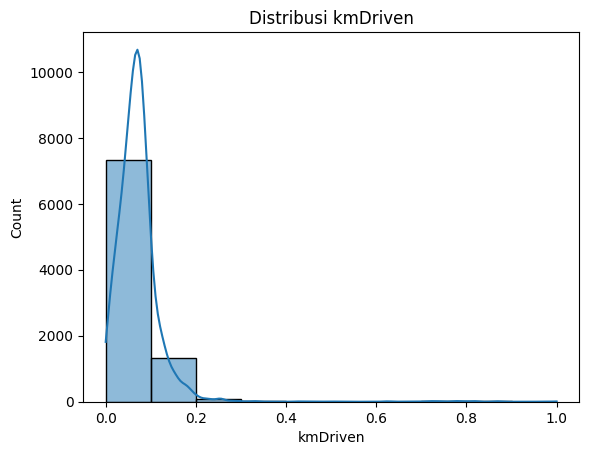

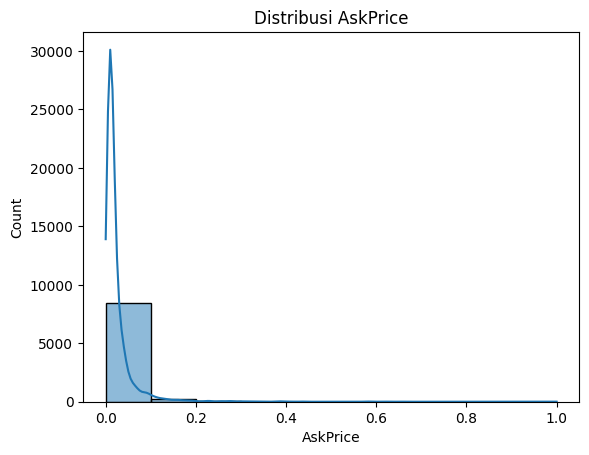

In [42]:
# Histogram kmDriven
sns.histplot(df['kmDriven'], bins=10, kde=True)
plt.title('Distribusi kmDriven')
plt.show()

# Histogram AskPrice
sns.histplot(df['AskPrice'], bins=10, kde=True)
plt.title('Distribusi AskPrice')
plt.show()

Analisis Korelasi untuk data Numerik dan Kategorikal karena kolom kolom ini berpengaruh untuk menentukan Harga Mobil

Berdasarkan Visualisasi Datanya,Jenis transmisi dan jarak tempuh adalah faktor yang paling relevan terhadap harga kendaraan dalam dataset ini. Namun, pengaruhnya masih tergolong sedang hingga lemah, sehingga faktor tambahan mungkin diperlukan untuk memprediksi harga secara akurat.

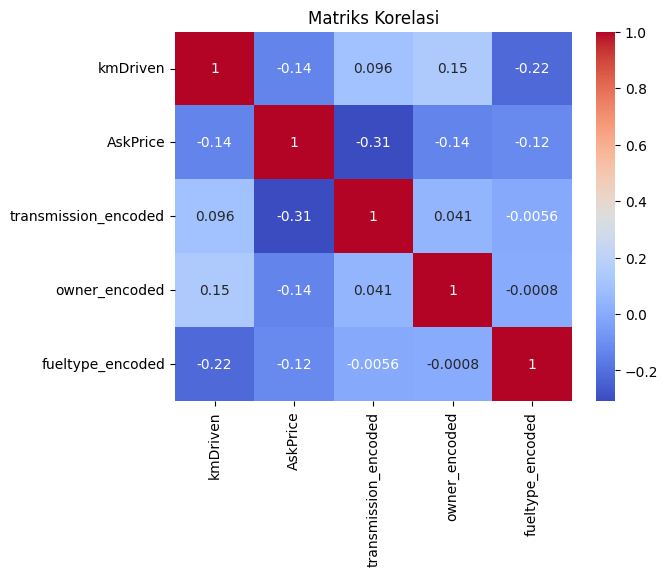

In [49]:
numerical = df[['kmDriven', 'AskPrice','transmission_encoded','owner_encoded','fueltype_encoded']]

# Matriks korelasi
correlation = numerical.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

Disini juga merupakan Visualisasi data AskPrice jika berdasrkan jenis bahan bakar

Untuk jenis transmisi juga dapat dilihat bahwa harga lebih tinggi jika jenis transmisinya automatic

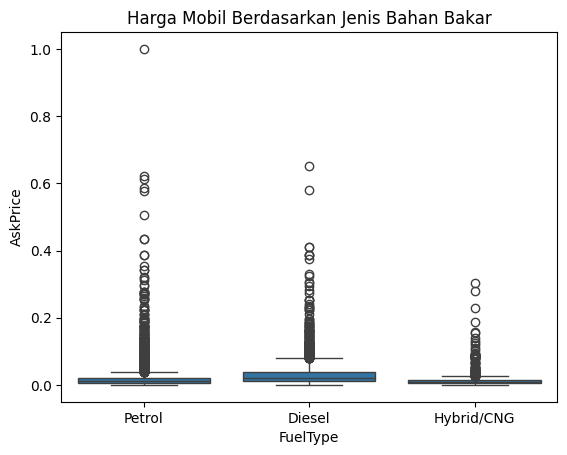

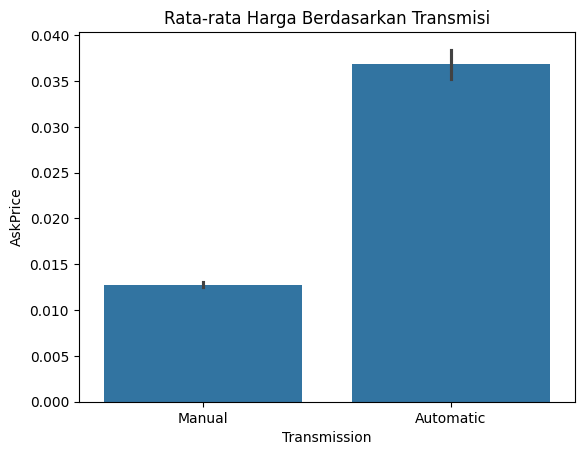

In [50]:
# Boxplot AskPrice berdasarkan FuelType
sns.boxplot(x='FuelType', y='AskPrice', data=df)
plt.title('Harga Mobil Berdasarkan Jenis Bahan Bakar')
plt.show()

# Barplot rata-rata harga berdasarkan Transmission
sns.barplot(x='Transmission', y='AskPrice', data=df)
plt.title('Rata-rata Harga Berdasarkan Transmisi')
plt.show()

Mendeteksi Outlier dan ternyata kedua data numerik ini memiliki outlier

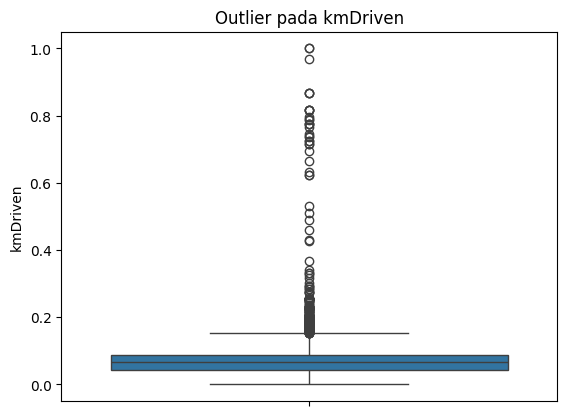

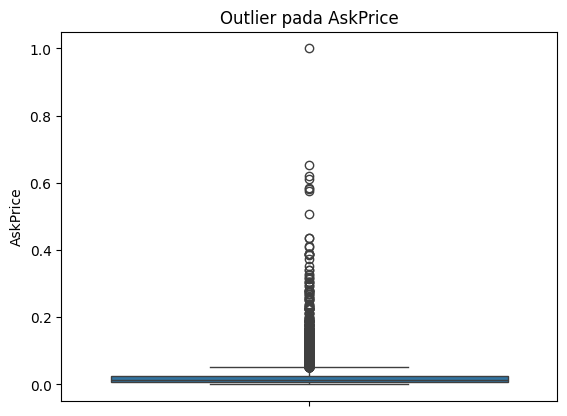

In [51]:
# Boxplot untuk kmDriven
sns.boxplot(df['kmDriven'])
plt.title('Outlier pada kmDriven')
plt.show()

# Boxplot untuk AskPrice
sns.boxplot(df['AskPrice'])
plt.title('Outlier pada AskPrice')
plt.show()

Deteksi Anomali dan hasilnya semua data valid dan relevan

In [52]:
# Cek apakah ada mobil dengan tahun produksi lebih besar dari tahun sekarang
print(df[df['Year'] > 2024])

# Cek apakah ada harga atau kilometer yang sangat kecil atau besar
print(df[df['AskPrice'] < 10000])
print(df[df['kmDriven'] > 500000])

Empty DataFrame
Columns: [Brand, model, Year, kmDriven, Transmission, Owner, FuelType, AskPrice, transmission_encoded, fueltype_encoded, owner_encoded]
Index: []
              Brand      model  Year  kmDriven Transmission   Owner  \
0             Honda       City  2001  0.100000       Manual  second   
1            Toyota     Innova  2009  0.193877       Manual  second   
2        Volkswagen  VentoTest  2010  0.078822       Manual   first   
3     Maruti Suzuki      Swift  2017  0.085204       Manual  second   
4     Maruti Suzuki     Baleno  2019  0.045918    Automatic   first   
...             ...        ...   ...       ...          ...     ...   
9576        Porsche    Cayenne  2023  0.007857    Automatic   first   
9578  Maruti Suzuki   Alto-800  2020  0.056122       Manual   first   
9579  Maruti Suzuki       Ritz  2013  0.093877       Manual   first   
9580        Hyundai      Verna  2019  0.073469    Automatic   first   
9581        Hyundai    New i20  2021  0.084926       Manu